# Lab Report 1
# Group 3
# Caroline Kuntz
# Niklas Landsberg

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Assumptions
risk_free_rate=0.002

In [3]:
#### Clean the data
#Downloaded data has to be freed from any information that is not necessary like "Copy right etc"
data_return = pd.read_csv('industry_portfolios_30.csv',index_col=0)

#Get rid off unnecessary spaces in rows
data_return= data_return.replace(" ","")

#Get rid off excessive columns
data_return.columns=data_return.columns.str.strip()

#Get rid off non-values
data_return.dropna()

#Format the date
data_return.index=pd.to_datetime(data_return.index, format="%Y%m")

#Format the date
data_return.index=data_return.index.to_period('M')

#Print oldest 5 dates
data_return.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,0.83,9.22,2.06,7.70,1.93,-23.79,0.07,1.87,0.37,5.20
1926-08,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,8.14,...,2.17,2.02,4.39,-2.38,4.88,5.39,-0.75,-0.13,4.46,6.76
1926-09,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.31,...,2.41,2.25,0.19,-5.54,0.05,-7.87,0.25,-0.56,-1.23,-3.86
1926-10,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-0.11,-2.00,-1.09,-5.08,-2.64,-15.38,-2.20,-4.11,-5.16,-8.49
1926-11,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.11,...,1.63,3.77,3.64,3.84,1.60,4.67,6.52,4.33,2.24,4.00


In [4]:
#Convert the returns into percentages
data_return=data_return/100

In [5]:
data_return.plot.line()

# Sharpe Ratio

In [6]:
#Calculate the sharpe ratio as a measurement for risk-adjusted performance
sharpe_ratio=(data_return.mean()-risk_free_rate)/data_return.std()

In [7]:
sharpe_ratio.sort_values(ascending=False)

Food     0.162684
Smoke    0.162024
Hlth     0.159579
Telcm    0.144384
Rtail    0.141637
BusEq    0.140862
Beer     0.140090
Paper    0.139612
Meals    0.135393
Chems    0.134712
Oil      0.129935
ElcEq    0.127938
Hshld    0.126785
Util     0.124913
Carry    0.124456
Servs    0.123708
Clths    0.123708
Fin      0.122554
FabPr    0.119594
Autos    0.109806
Cnstr    0.109484
Games    0.106131
Trans    0.102380
Txtls    0.099321
Books    0.097192
Mines    0.096294
Other    0.087774
Whlsl    0.086345
Steel    0.082287
Coal     0.072994
dtype: float64

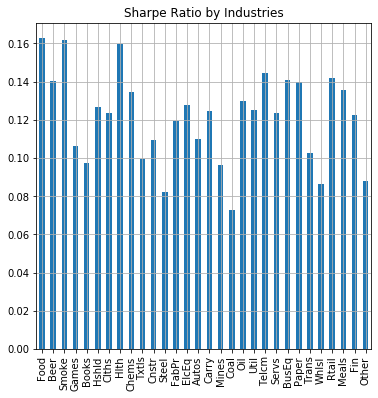

In [8]:
# Print maximum sharpe ratio
sharpe_ratio.plot.bar(title='Sharpe Ratio by Industries',figsize=(6,6),grid="Axis Gridline")

In [9]:
# Print name of industry with maximum sharpe ratio !! Generic: find a way how python directly says 
# which is the highest value !!!
sharpe_ratio.max()

0.16268369363925314

Food has the highest Sharpe Ratio

In [10]:
#Annualised Sharpe Ratio
ann_sharpe_ratio=sharpe_ratio*(252**0.5)

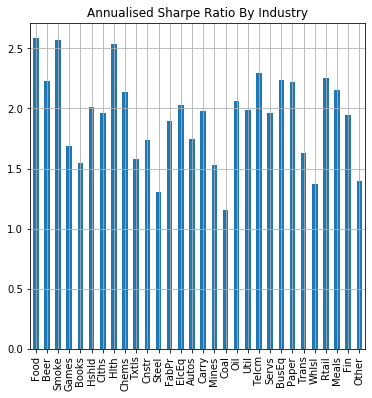

In [11]:
ann_sharpe_ratio.plot.bar(title='Annualised Sharpe Ratio By Industry',figsize=(6,6),grid="Axis Gridline")

# Industry size

In [12]:
#### Clean the data
#Downloaded data has to be freed from any information that is not necessary like "Copy right etc"
data_size = pd.read_csv('average_firm_size_30_industry_portfolios.csv',index_col=0)

#Get rid of unnecessary spaces in rows
data_size= data_size.replace(" ","")

#Get rid off excessive columns
data_size.columns=data_size.columns.str.strip()

#Get rid off non-values
data_size.dropna()

#Format the date
data_size.index=pd.to_datetime(data_size.index, format="%Y%m")

#Format the date
data_size.index=data_size.index.to_period('M')

#Print oldest 5 dates
data_size.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,...,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,...,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,...,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21
1926-10,37.14,8.92,64.42,28.76,14.42,21.23,19.03,26.87,68.47,6.82,...,364.16,15.30,59.52,34.77,70.83,0.88,46.15,10.80,19.36,26.16
1926-11,35.88,8.62,65.08,27.38,15.79,20.14,19.03,26.54,65.06,6.84,...,363.74,14.89,58.74,32.80,68.75,0.74,45.03,10.33,18.35,23.94


In [13]:
#### Clean the data
#Downloaded data has to be freed from any information that is not necessary like "Copy right etc"
data_nfirms = pd.read_csv('nfirms_30_industry_portfolios.csv',index_col=0)

#Get rid of unnecessary spaces in rows
data_nfirms= data_nfirms.replace(" ","")

#Get rid off excessive columns
data_nfirms.columns=data_nfirms.columns.str.strip()

#Get rid off non-values
data_nfirms.dropna()

#Format the date
data_nfirms.index=pd.to_datetime(data_nfirms.index, format="%Y%m")

#Format the date
data_nfirms.index=data_nfirms.index.to_period('M')

#Print oldest 5 dates
data_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [14]:
#Checking if same length of period and industries
#rows, colums
data_nfirms.shape

#rows, colums
data_size.shape

(1122, 30)

In [15]:
data_market_cap=data_nfirms*data_size

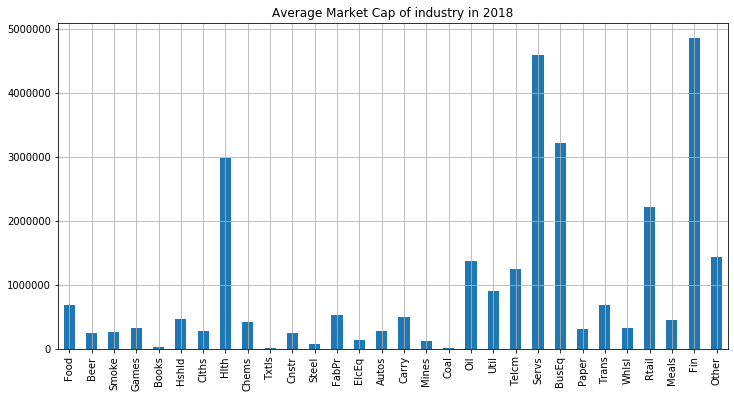

In [16]:
#!!! Careful it is the average monthly size of the industry in 2018 and not the yearly !!! 

data_market_cap['2018'].mean().plot.bar(figsize=(12,6),title='Average Market Cap of industry in 2018',grid="Axis Gridline")

In [17]:
data_market_cap_2018=data_market_cap['2018'].mean()

In [18]:
data_market_cap_2018.max()

4853888.285833333

In [19]:
# !!! Find a way how python says the highest value on its own !!!
data_market_cap_2018['Fin'].mean()

4853888.285833333

# Value-weighted Portfolio

In [20]:
#Choose the lowest and highest portfolios
columns=['Oil','Coal','Autos','Mines']

In [21]:
data_return=data_return[columns]

In [22]:
#Oldest 5 returns
data_return.head()

,Oil,Coal,Autos,Mines
1926-07,-0.0140,0.0154,0.1639,0.0564
1926-08,0.0369,0.0085,0.0423,0.0055
1926-09,-0.0369,0.0030,0.0483,0.0174
1926-10,-0.0104,0.0223,-0.0793,-0.0320
1926-11,0.0006,-0.0048,-0.0066,0.0846


In [23]:
data_market_cap=data_market_cap[columns]

In [24]:
total_market_cap=data_market_cap.sum(axis='columns')

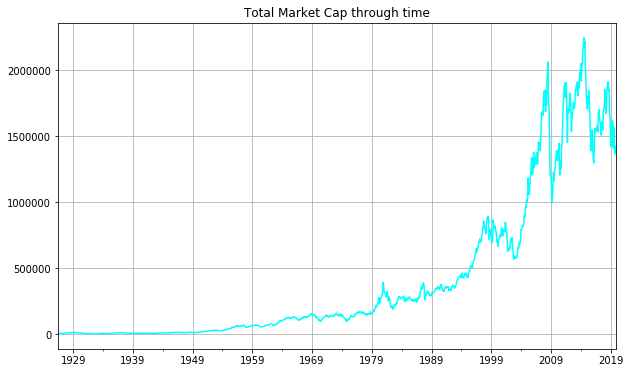

In [25]:
total_market_cap.plot(figsize=(10,6),title="Total Market Cap through time",color="aqua",grid="Axis Gridline")

In [26]:
cap_weight=data_market_cap.divide(total_market_cap,axis="rows")

In [27]:
cap_weight.tail()

,Oil,Coal,Autos,Mines
2019-08,0.754493,0.004840,0.167899,0.072767
2019-09,0.749696,0.004498,0.169022,0.076784
2019-10,0.747674,0.003973,0.171653,0.076701
2019-11,0.734936,0.003532,0.183967,0.077565
2019-12,0.729811,0.003150,0.187445,0.079594


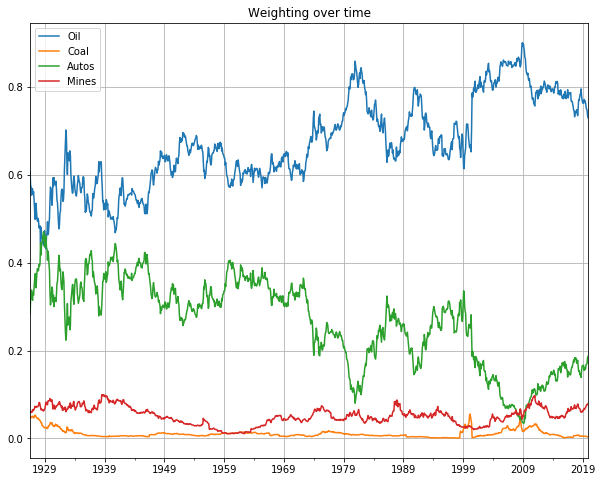

In [28]:
cap_weight[columns].plot(figsize=(10,8),title="Weighting over time",grid="Axis Gridline")

In [29]:
# Multiply the cap weight with return and sum it over the columns
total_market_return=(cap_weight*data_return).sum(axis='columns')

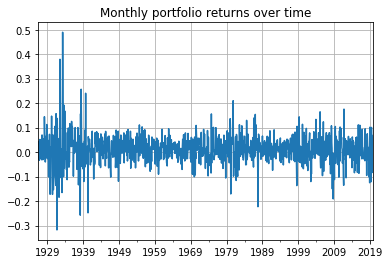

In [30]:
total_market_return.plot.line(title='Monthly portfolio returns over time',grid="Axis Gridline")

In [31]:
total_market_index=1*(1+total_market_return).cumprod()

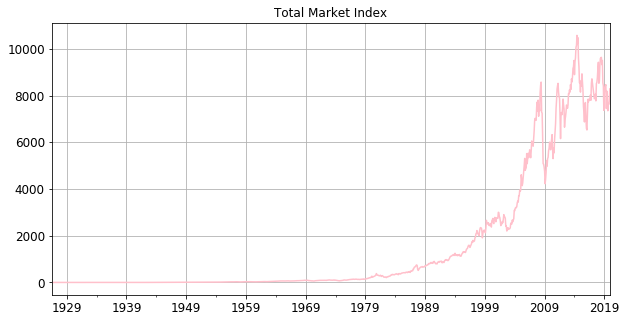

In [32]:
total_market_index.plot(figsize=(10,5),title="Total Market Index",fontsize=12,color="pink",grid="Axis Gridline")

In [33]:
sharpe_ratio=(total_market_return.mean()-risk_free_rate)/total_market_return.std()

In [34]:
sharpe_ratio

0.13108005663541586